In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df_train_trans=pd.read_csv('../input/transaction_TRAIN.csv') # (161965, 27)
df_train_op=pd.read_csv('../input/operation_TRAIN.csv') # (424481, 20)
df_train_tag=pd.read_csv('../input/tag_TRAIN.csv') # (13422, 2)

df_train_trans.rename(columns=lambda col:'trans_'+col if col!='UID' else col,inplace=True)
df_train_op.rename(columns=lambda col:'op_'+col if col!='UID' else col,inplace=True)

df_tag_uids=df_train_tag['UID'] # 标签中的UID都是唯一的
black_uids=df_train_tag[df_train_tag['Tag']==1]['UID']
white_uids=df_train_tag[df_train_tag['Tag']==0]['UID']

black_trans=df_train_trans[df_train_trans['UID'].isin(black_uids)]
white_trans=df_train_trans[df_train_trans['UID'].isin(white_uids)]

black_op=df_train_op[df_train_op['UID'].isin(black_uids)]
white_op=df_train_op[df_train_op['UID'].isin(white_uids)]


In [7]:
df_train_trans.columns

Index(['UID', 'trans_channel', 'trans_day', 'trans_time', 'trans_trans_amt',
       'trans_amt_src1', 'trans_merchant', 'trans_code1', 'trans_code2',
       'trans_trans_type1', 'trans_acc_id1', 'trans_device_code1',
       'trans_device_code2', 'trans_device_code3', 'trans_device1',
       'trans_device2', 'trans_mac1', 'trans_ip1', 'trans_bal',
       'trans_amt_src2', 'trans_acc_id2', 'trans_acc_id3', 'trans_geo_code',
       'trans_trans_type2', 'trans_market_code', 'trans_market_type',
       'trans_ip1_sub'],
      dtype='object')

## 羊毛党地理位置

In [9]:
df_train_trans['trans_geo_code'].head()

0    wsbq
1    wte7
2    ws7n
3    wqj6
4     NaN
Name: trans_geo_code, dtype: object

In [23]:
black_trans['trans_geo_code'].dropna(inplace=True)

E:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:3893: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [48]:
import geohash
def get_lalon(df):
    lon=[]
    la=[]
    for geo_code in df:
        la.append(int(geohash.decode(geo_code)[0]))
        lon.append(int(geohash.decode(geo_code)[1]))       
    return lon,la
lon,la=get_lalon(black_trans['trans_geo_code'])

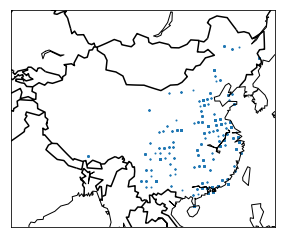

In [45]:
m = Basemap( llcrnrlon=77,
    llcrnrlat=14,
    urcrnrlon=140,
    urcrnrlat=51,
    projection='lcc',
    lat_1=33,
    lat_2=45,
    lon_0=100)
m.drawcountries(linewidth=1.5)
m.drawcoastlines()
x, y = m(lon, la)
# Use matplotlib to draw the points onto the map.
m.scatter(x, y, s=1)
plt.show()


## 白用户地理位置分布

E:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:3893: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


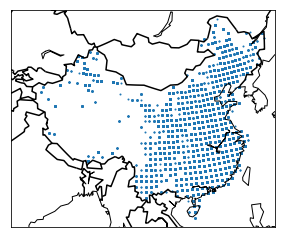

In [50]:
white_trans['trans_geo_code'].dropna(inplace=True)
lon,la=get_lalon(white_trans['trans_geo_code'])
m = Basemap( llcrnrlon=77,
    llcrnrlat=14,
    urcrnrlon=140,
    urcrnrlat=51,
    projection='lcc',
    lat_1=33,
    lat_2=45,
    lon_0=100)
m.drawcountries(linewidth=1.5)
m.drawcoastlines()
x, y = m(lon, la)
# Use matplotlib to draw the points onto the map.
m.scatter(x, y, s=1)
plt.show()